# EMAIL SPAM DETECTION  TASK-4

## Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

## Load the Datasets

In [6]:
# Load the CSV file with a specified encoding
file_path = r'C:\Users\anand\OneDrive\Desktop\spam.csv'
try:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')  # You can also try 'latin1' or 'cp1252'
except UnicodeDecodeError:
    print("Error decoding file. Try a different encoding.")
    # Optional: Try other encodings here if needed
    df = pd.read_csv(file_path, encoding='latin1')  # Trying 'latin1' as an alternative

In [7]:
# Display the first few rows and column names
print("Dataset Preview:")
print(df.head())
print("\nColumn Names:")
print(df.columns)

Dataset Preview:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  

Column Names:
Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


## Data Preprocessing

In [8]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [9]:
# Encode labels
label_encoder = LabelEncoder()
df['v1'] = label_encoder.fit_transform(df['v1'])  # 0 for 'ham', 1 for 'spam

In [10]:
# Features and target variable
X = df['v2']  # Text data
y = df['v1']  # Labels

In [11]:
# Convert text data to numerical data using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Model Building
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [14]:
# Predicting and Evaluating the Model
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
[[952  13]
 [ 11 139]]


## Exploratory Data Analysis (EDA)

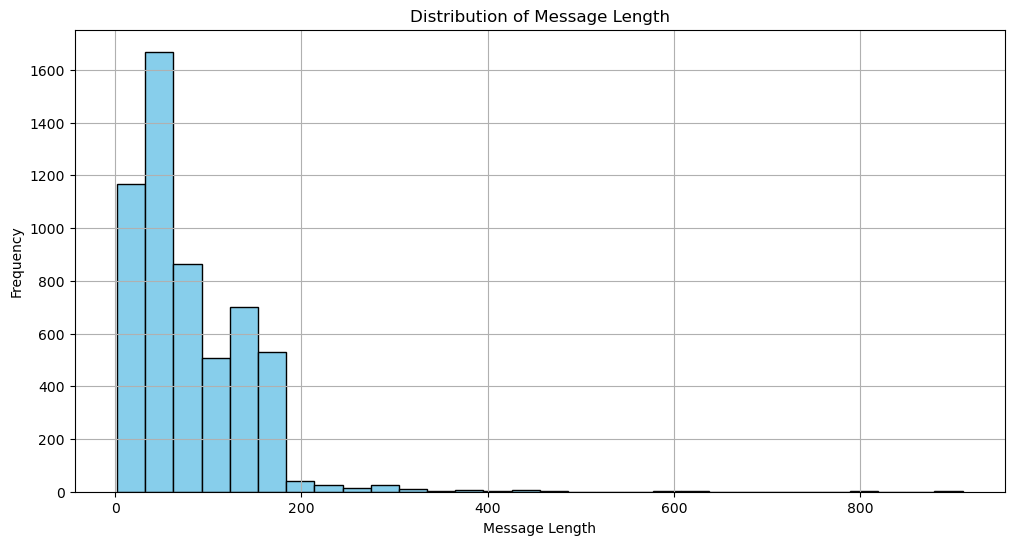

In [15]:
# 1. Histogram of Message Length
df['Message_Length'] = df['v2'].apply(len)
plt.figure(figsize=(12, 6))
plt.hist(df['Message_Length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Message Length')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

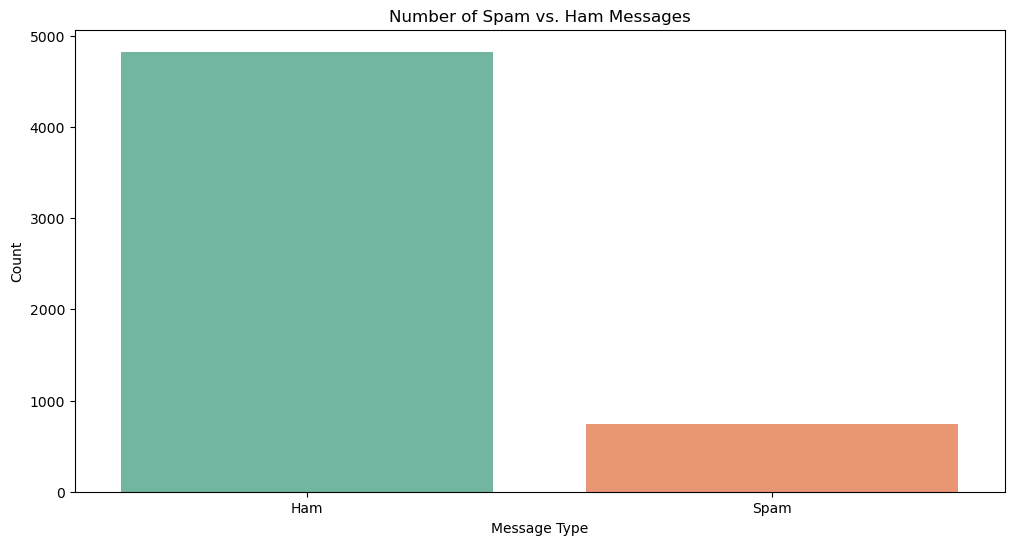

In [16]:
# 2. Bar Plot of Spam vs. Ham
spam_ham_counts = df['v1'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=spam_ham_counts.index, y=spam_ham_counts.values, palette='Set2')
plt.title('Number of Spam vs. Ham Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

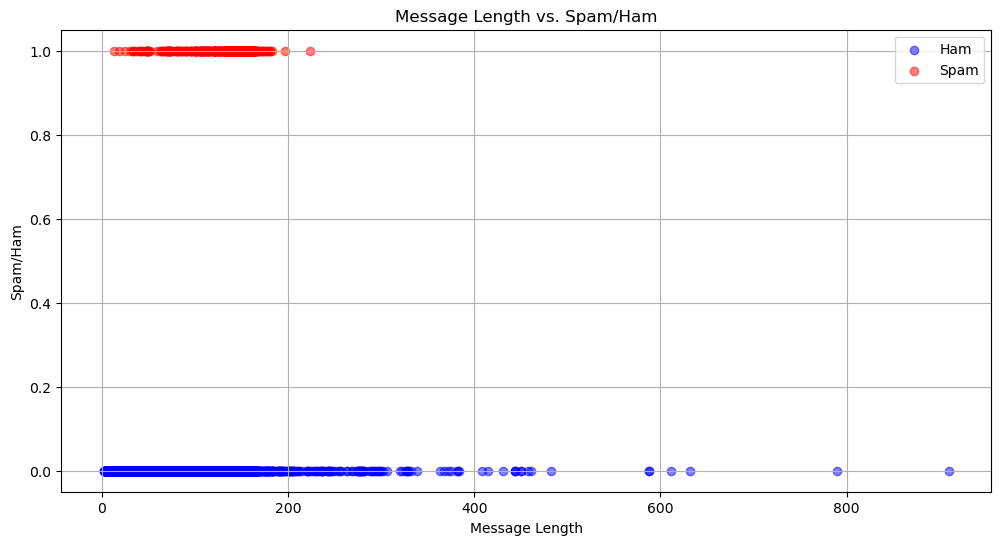

In [17]:
# 3. 2D Plot: Message Length vs. Label
plt.figure(figsize=(12, 6))
plt.scatter(df[df['v1'] == 0]['Message_Length'], df[df['v1'] == 0]['v1'], alpha=0.5, c='blue', label='Ham')
plt.scatter(df[df['v1'] == 1]['Message_Length'], df[df['v1'] == 1]['v1'], alpha=0.5, c='red', label='Spam')
plt.title('Message Length vs. Spam/Ham')
plt.xlabel('Message Length')
plt.ylabel('Spam/Ham')
plt.legend()
plt.grid(True)
plt.show()

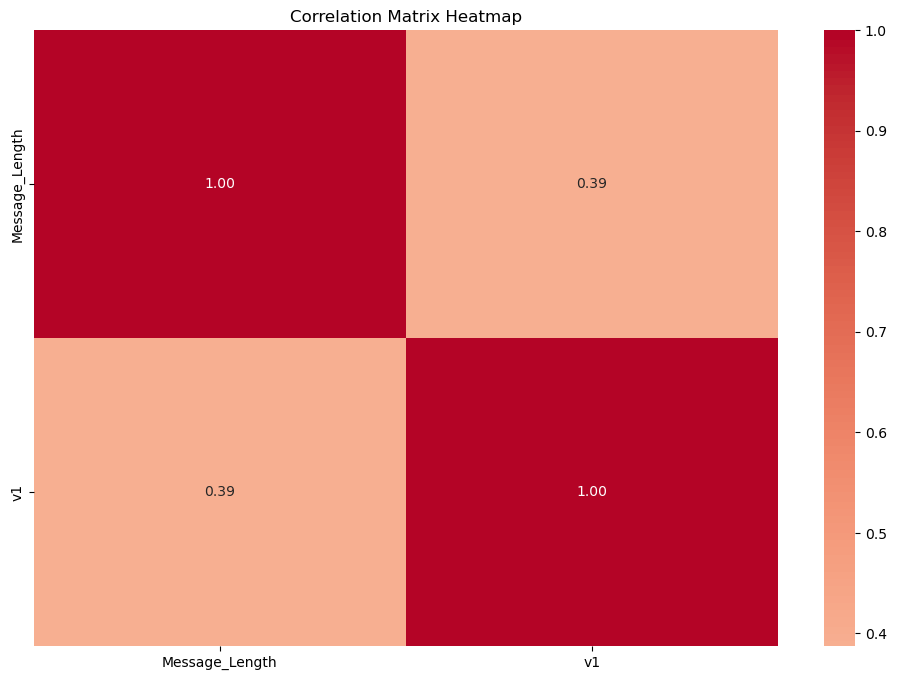

In [18]:
# 4. Heatmap of Correlation Matrix
numeric_df = df[['Message_Length', 'v1']]
corr = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

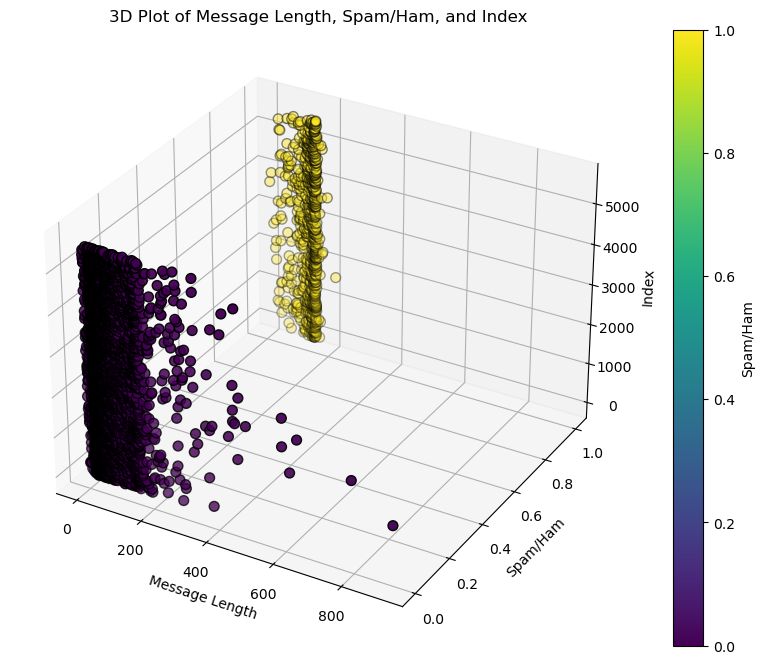

In [22]:
# 5. 3D Plot: Message Length vs. Spam/Ham vs. Count
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Prepare data for 3D plot
x = df['Message_Length']
y = df['v1']
z = np.arange(len(df))  # Just for visualization purposes, not meaningful in this context
# 3D scatter plot
sc = ax.scatter(x, y, z, c=y, cmap='viridis', edgecolor='k', s=50)
ax.set_xlabel('Message Length')
ax.set_ylabel('Spam/Ham')
ax.set_zlabel('Index')
ax.set_title('3D Plot of Message Length, Spam/Ham, and Index')
# Adding a color bar for reference
plt.colorbar(sc, label='Spam/Ham')
plt.show()